#### Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data = df.copy()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Name of the Variables and Shape of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### Observation
1. The Dataset consists of 13 independent variables and 1 dependent variable i.e Personal Loan with 5000 rows
2. Since there is no column with datatype as object it indicates there are no missing values.

#### Univariate Analysis

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Observations
1. There is no Missing Data in the dataset.
2. The column ID & ZIP Code does not add any interesting information. It does not provide any conclusion for potential loan customers. We can neglect this information for our model prediction.
3. It got 7 numeric variables: ‘Age’, ‘CCAvg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip Code’, ‘Experience’
4. There are negative values in the Experience column which need to be corrected/resolved.
5. It got 2 categorical variables: ‘Education’, ‘Family’
6. It got 5 Boolean variables: ‘CD Account’, ‘CreditCard’, ‘Online’, ‘Personal Loan’, ‘Securities Account’
7. Personal Loan is the Target Variable
8. Around 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
9. Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
10. Around 60% of customers use internet banking facilities.
12. Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
12. Around 90% of the customer doesn’t have a securities account with the bank.

#### Multivariate Analysis

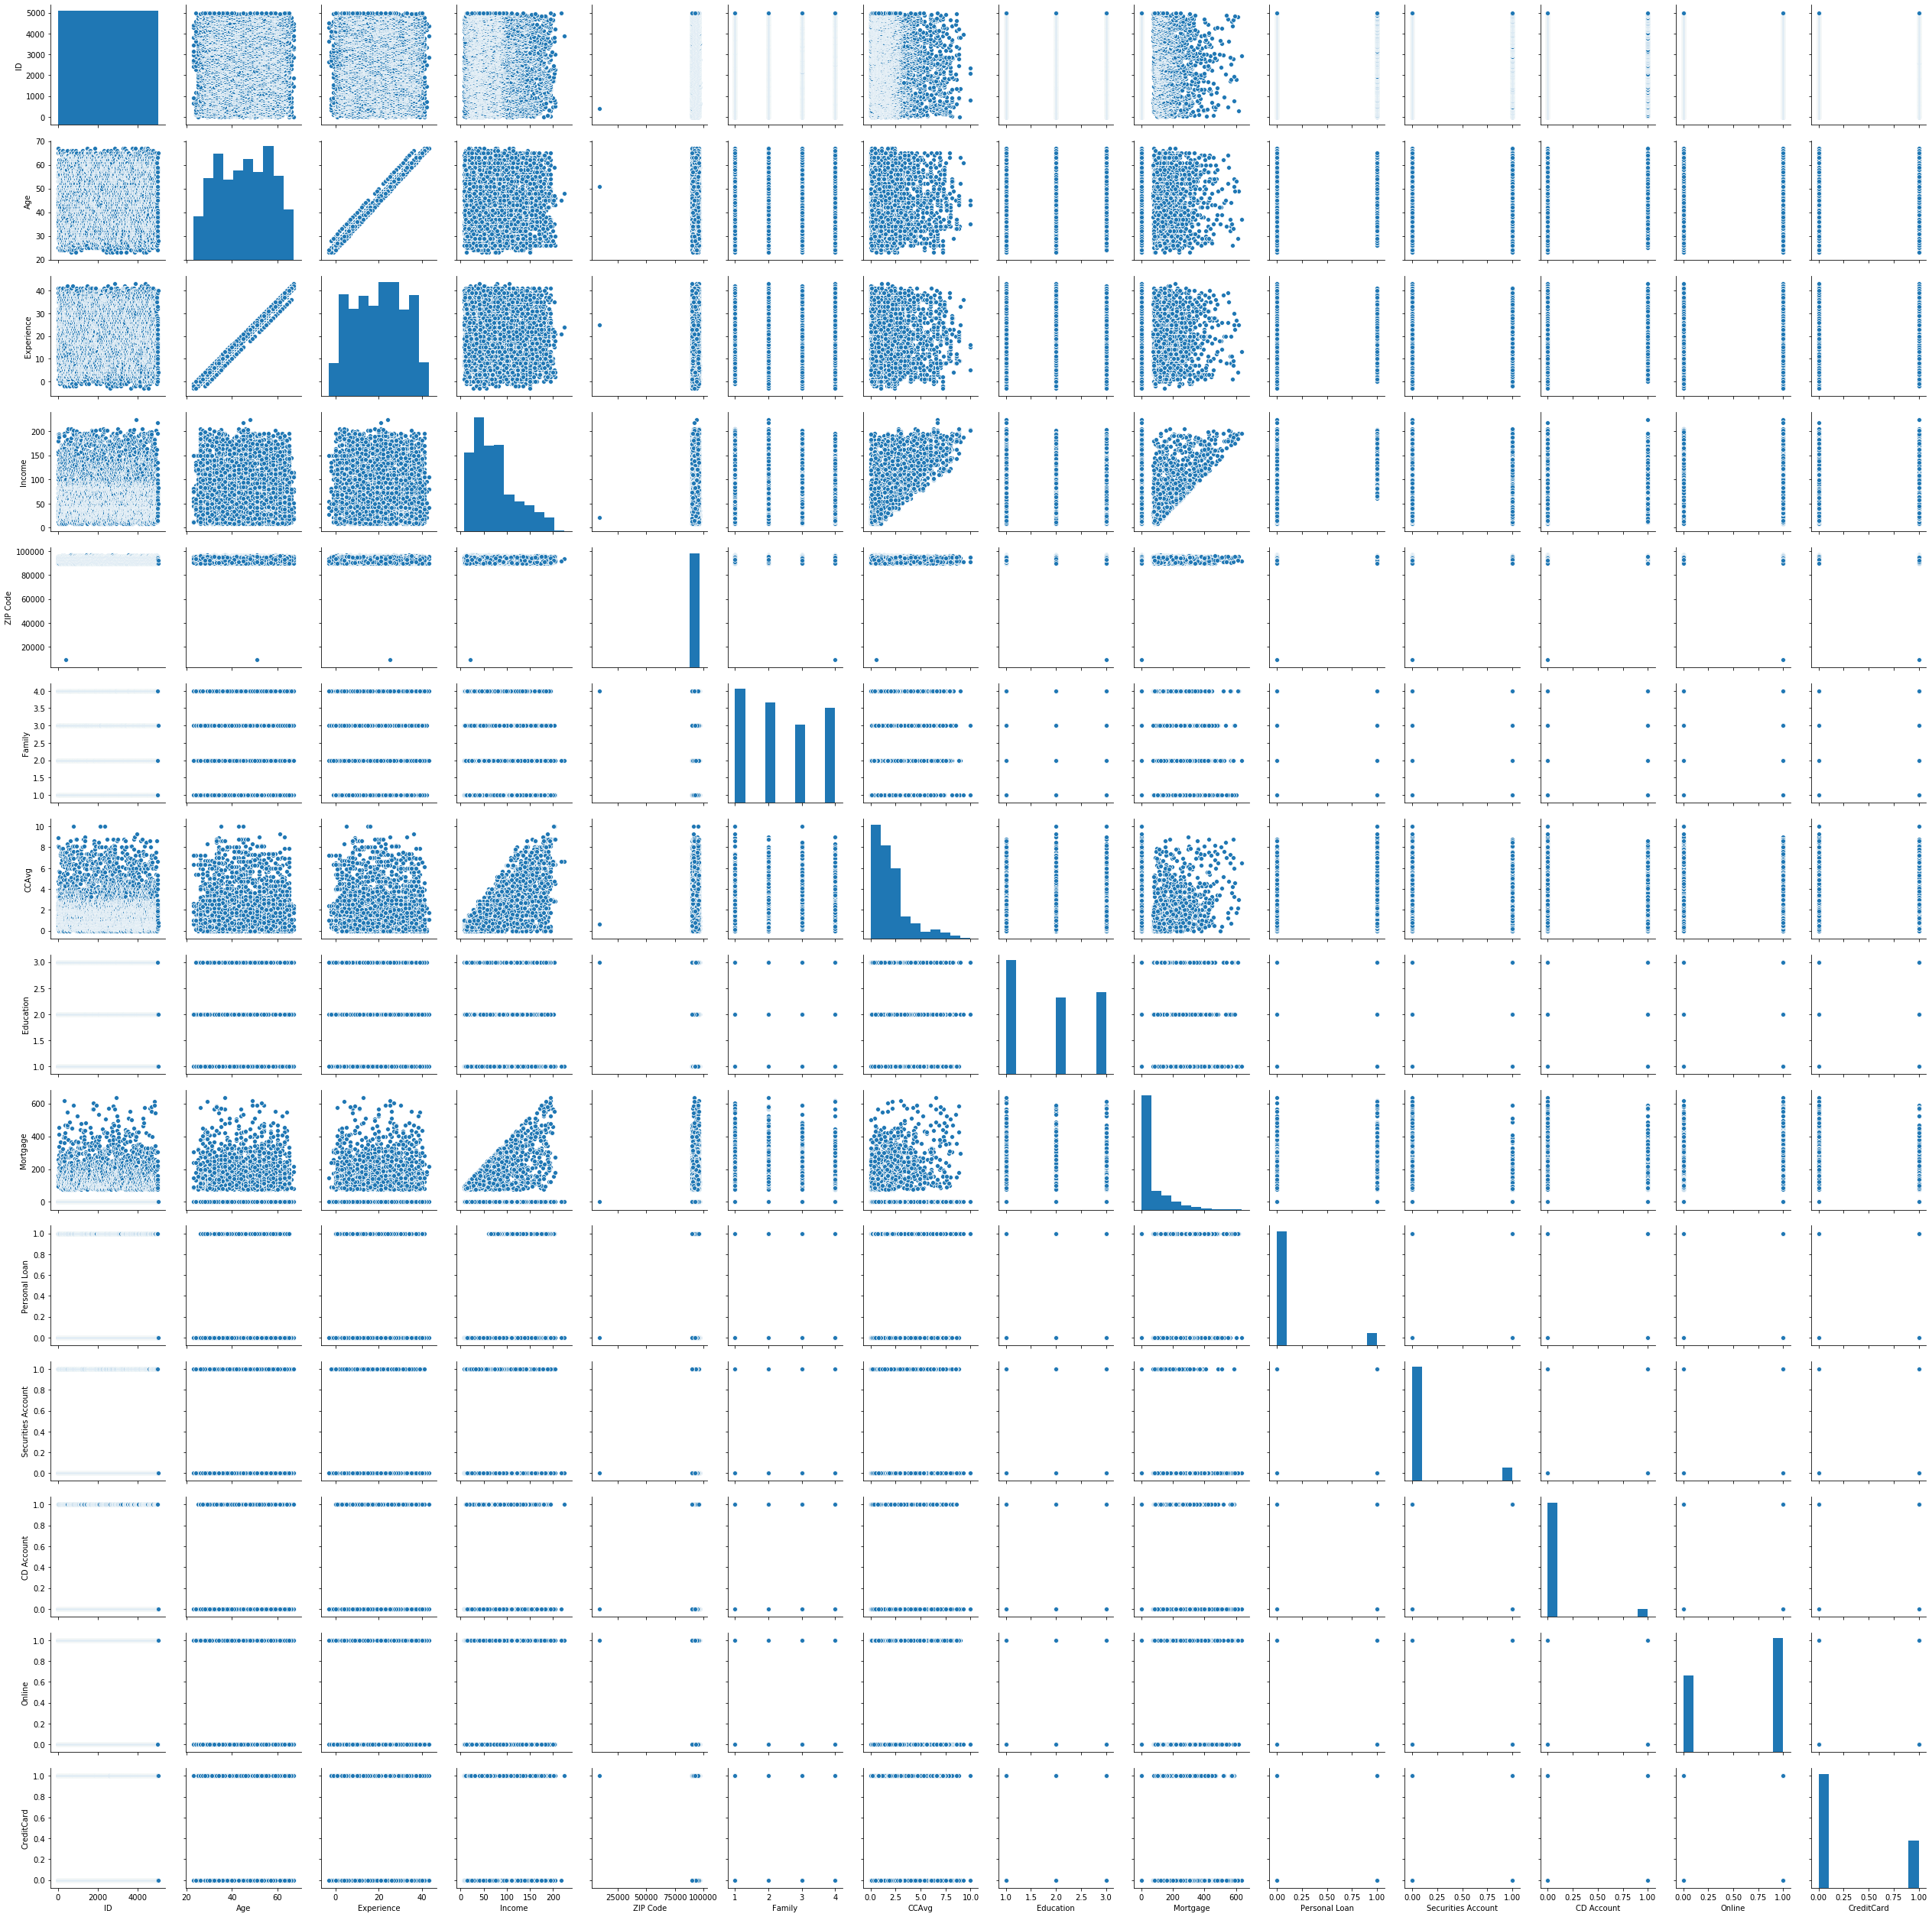

In [5]:
sns.pairplot(df)

##### Observations
1. Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
2. Experience is highly correlated with Age
3. Income is highly correlated with average spending on Credit cards. It is also correlated with Education & Mortgage.
4. A customer has CD account is correlated with having Securities account with the bank & with using of credit card issued by Universal Bank

0.8413386072610816

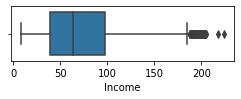

In [6]:
plt.figure(figsize=(4,1))
sns.boxplot(df['Income'])
df['Income'].skew()

-0.02934068151284029

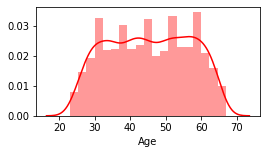

In [7]:
plt.figure(figsize=(4,2))
sns.distplot(df['Age'], color = 'r')
df['Age'].skew()

-0.026324688402384513

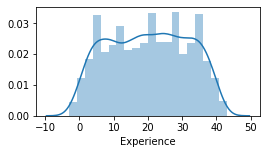

In [8]:
plt.figure(figsize=(4,2))
sns.distplot(df['Experience'])
df['Experience'].skew()

2.1040023191079444

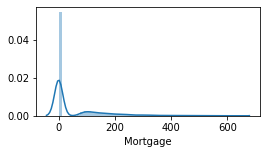

In [9]:
plt.figure(figsize=(4,2))
sns.distplot(df['Mortgage'])
df['Mortgage'].skew()

1.5984433366678663

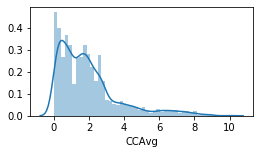

In [10]:
plt.figure(figsize=(4,2))
sns.distplot(df['CCAvg'])
df['CCAvg'].skew()

##### Observations
1. Income is positively skewed variable. The Average income of customers is between 45K and 100K. Majority income is between 45K to 55K. Here, Mean is greater than median.
2. Age is normally distributed with majority of customers falling between 30 years and 60 years of age. Here, Mean is almost equal to median.
3. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median.
4. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
5. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
6. The variables family and education are ordinal variables. The distribution of families is evenly distributed.

#### Negative Value Treatment

In [11]:
#There are 52 records with Negative experience. We need to clean it first.
df[df['Experience'] < 0]['Experience'].count()

52

In [12]:
#Fetching all the ID's with negative experiences
col = 'Experience'
dfExp = df.loc[df[col]>0]
negIds = df.loc[df[col] < 0]['ID'].tolist()

In [13]:
#Taking age and education of the paritcular row with negative experience. Filtering the dataset based on this criteria and
#calculating median of Experience. Eventually cleaning the negative experiences from the data.
for id in negIds:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    edu = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == edu)]
    exp = df_filtered[col].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, col] = exp

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Outlier Treatment

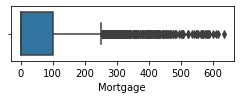

In [15]:
#Mortgage contains outliers hence we can treat such that it doesn't effect the distribution
plt.figure(figsize=(4,1))
sns.boxplot(df['Mortgage'])

In [16]:
from scipy import stats
df['Mortgage_zscore'] = np.abs(stats.zscore(df['Mortgage']))
df = df[df['Mortgage_zscore'] < 3]
df.drop('Mortgage_zscore', axis=1, inplace=True)

In [17]:
df.shape

(4895, 14)

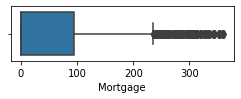

In [18]:
plt.figure(figsize=(4,1))
sns.boxplot(df['Mortgage'])

#### Missing Value

In [19]:
#Dropping the rows with NaN value in experience column
df.dropna(inplace=True)
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Target Column Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C42391BAC8>]],
      dtype=object)

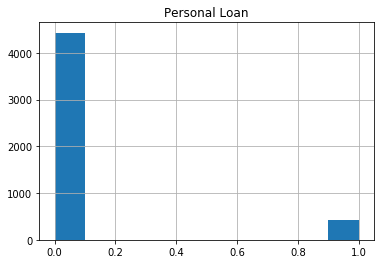

In [20]:
df.hist(column='Personal Loan')

##### Observation
1. Personal Loan is a Boolean variable.
2. Around 90% of the customer doesn’t accept and only 10% accepted the personal loan offered in the last campaign.
3. As identified earlier, Personal Loan is highly correlated with Income, CCAvg, Mortgage & CD Account.

#### Data Distribution of Personal Loan

1. Categorical Variable vs Target Variable

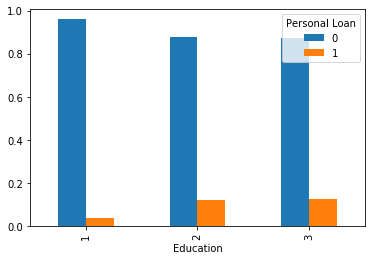

In [21]:
#Eduction Variable
ct = pd.crosstab(df['Education'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation: Customers who are more educated have a higher probability of buying personal loans

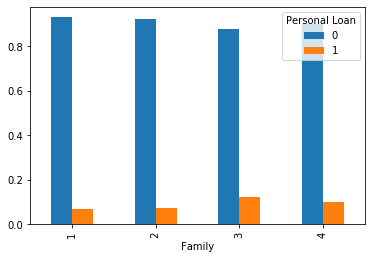

In [22]:
#Family Variable
ct = pd.crosstab(df['Family'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation : Family size does not have significant impact in personal loan. But it seems families with size of 3 are more likely to take loan.

2. Boolean Independent Variable vs Target Variable

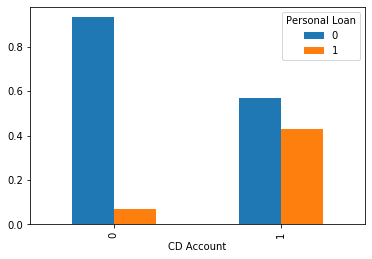

In [23]:
#CD Account
ct = pd.crosstab(df['CD Account'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation : Customer who has a CD account with the bank seems to buy personal loans from the bank.

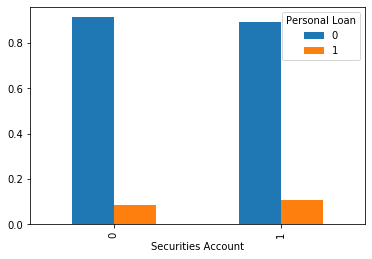

In [24]:
#Securities Account
ct = pd.crosstab(df['Securities Account'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation : Customer having Securities account doesn't seems to affect the probability of buying personal loans from the bank.

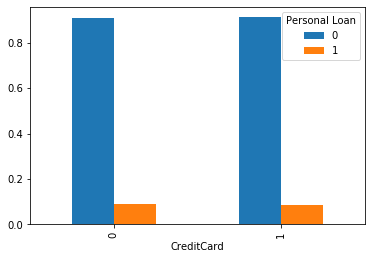

In [25]:
#Credit Card
ct = pd.crosstab(df['CreditCard'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation : Customer having Credit Card doesn't seems to affect the probability of buying personal loans from the bank.

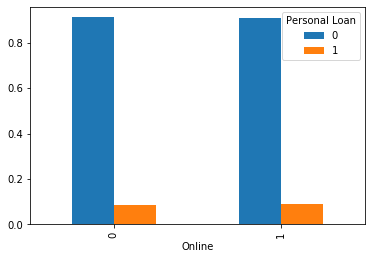

In [26]:
#Online
ct = pd.crosstab(df['Online'], df['Personal Loan'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

##### Observation : Customer using internet banking doesn't seems to affect the probability of buying personal loans from the bank.

3. Numerical Independent Variable vs Target Variable

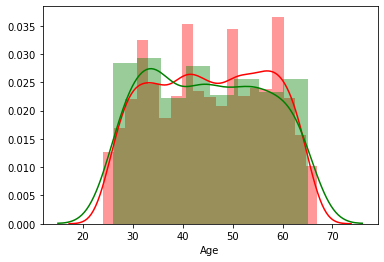

In [27]:
#Age
sns.distplot(df[df['Personal Loan'] == 0]['Age'], color = 'r')
sns.distplot(df[df['Personal Loan'] == 1]['Age'], color = 'g')

##### Observation: Applicant Age does not affect the chances of buying the personal loan

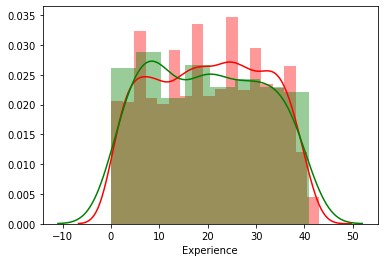

In [28]:
#Experience
sns.distplot(df[df['Personal Loan'] == 0]['Experience'], color = 'r')
sns.distplot(df[df['Personal Loan'] == 1]['Experience'], color = 'g')

##### Observation: Applicant Experience does not affect the chances of buying the personal loan. This is expected as Experience is highly correlated with Age

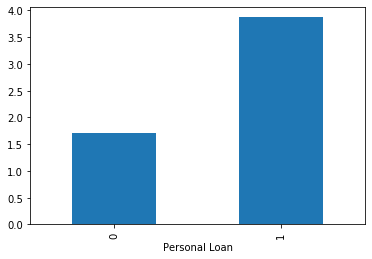

In [29]:
#CCAvg
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

##### Observation: Customers who have taken personal loan have higher credit card average than those who did not take. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan

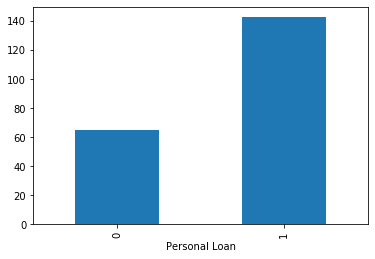

In [30]:
#Income
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

##### Observation: It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan

#### Correlation Comparison

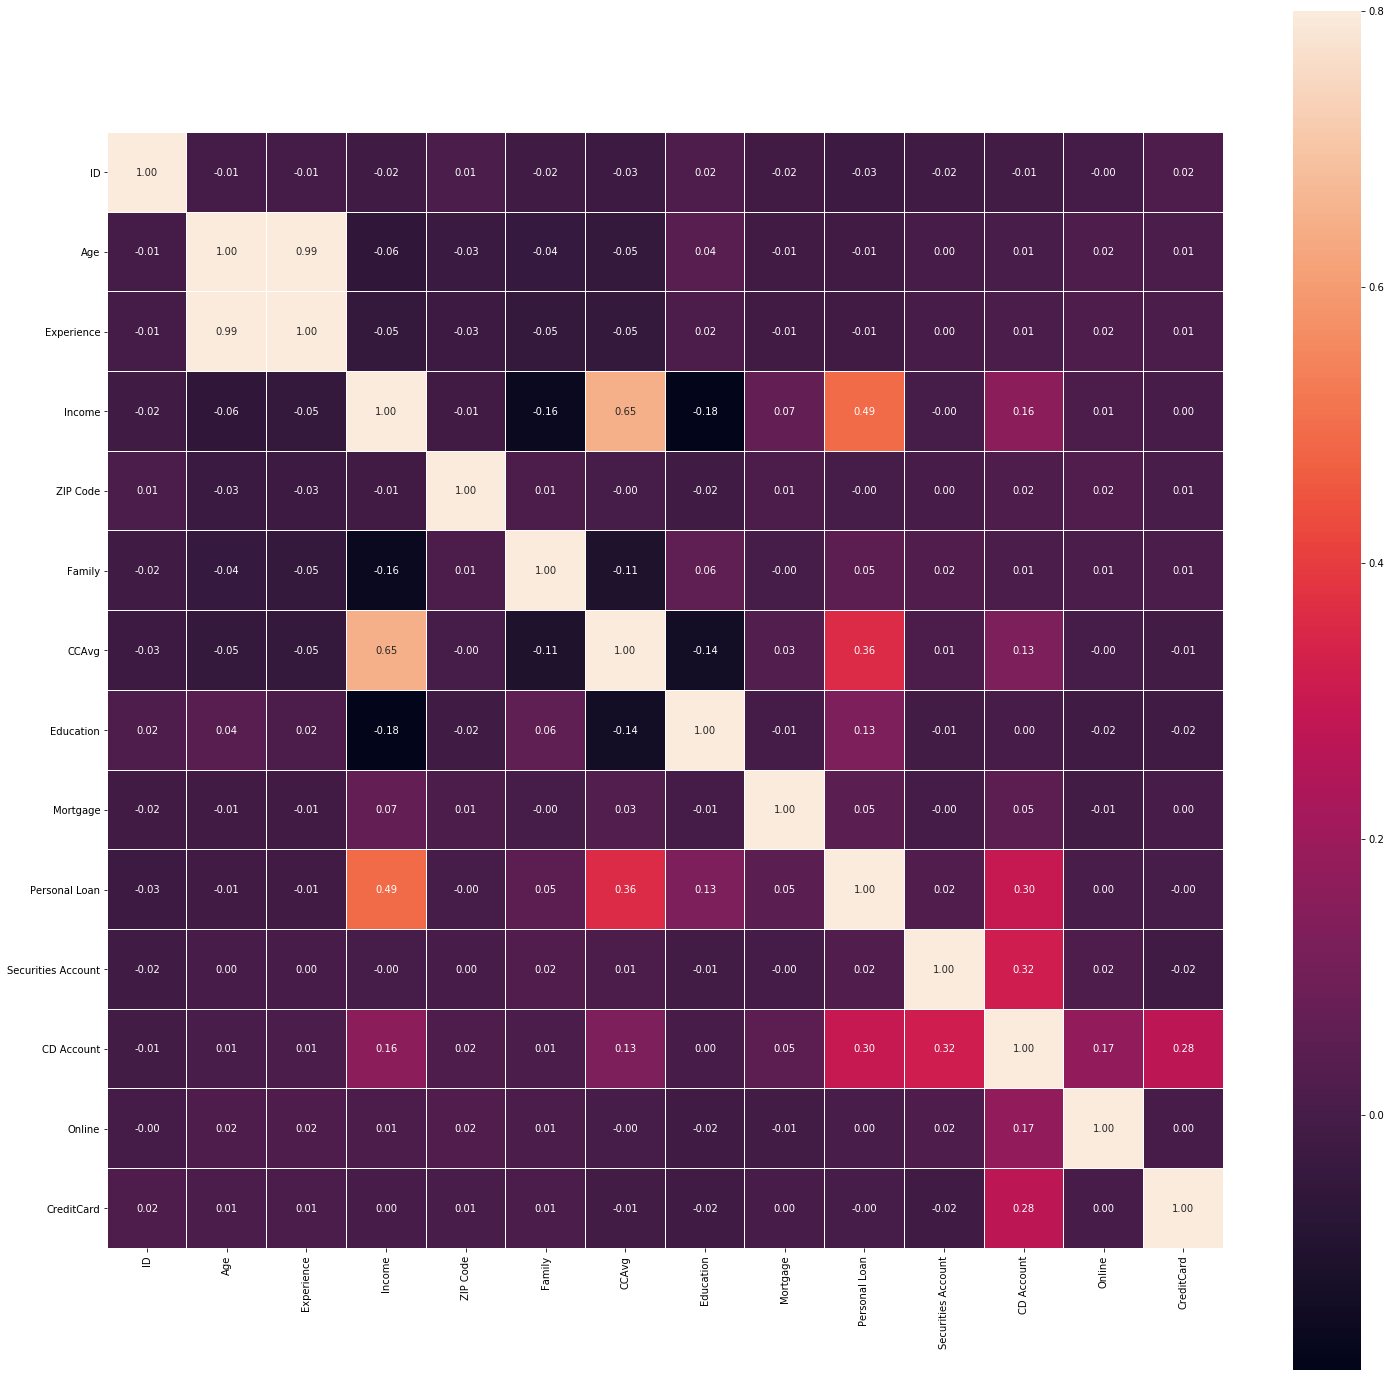

In [31]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), square=True, annot=True, linecolor='white', vmax=.8, fmt='.2f',linewidths=0.01)

#Logic to manage the known issue with Matplotlib version 3.1.11 w.r.t. Heat Map
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Observation
1. Age and Experience is highly correlated
2. Income and CCAvg is also correlated

#### Data Refining

In [32]:
# Dropping ID & ZIP Code column as they are number of Series. Dropping Experience as it is highly correlated with Age
df.drop('ID', axis=1, inplace=True)
df.drop('ZIP Code', axis=1, inplace=True)
df.drop('Experience', axis=1, inplace=True)

In [33]:
df["Personal Loan"].value_counts(normalize=True)

0    0.911015
1    0.088985
Name: Personal Loan, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4866 entries, 0 to 4999
Data columns (total 11 columns):
Age                   4866 non-null int64
Income                4866 non-null int64
Family                4866 non-null int64
CCAvg                 4866 non-null float64
Education             4866 non-null int64
Mortgage              4866 non-null int64
Personal Loan         4866 non-null int64
Securities Account    4866 non-null int64
CD Account            4866 non-null int64
Online                4866 non-null int64
CreditCard            4866 non-null int64
dtypes: float64(1), int64(10)
memory usage: 456.2 KB


## Model Building

#### Standardizing / Normalizing Data
The data is having different scales or units, we need to standardize it before running models. This will help us in getting more accurate results

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaledData = pd.DataFrame(scaler.fit_transform(df))
scaledData.columns = df.columns

#### Creating Training & Test Set (70:30)

In [36]:
from sklearn.model_selection import train_test_split
#Set of Independent Variables
X=df.drop('Personal Loan', axis=1)
#Dependent Variable
y=df['Personal Loan']

Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.30)

In [37]:
Xtrain.shape

(3406, 10)

In [38]:
Xtest.shape

(1460, 10)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr.score(Xtrain, ytrain)

0.950381679389313

In [41]:
lr.score(Xtest, ytest)

0.9506849315068493

#### Evaluate Performance

In [42]:
lr_ypred = lr.predict(Xtest)
print("Classification Report: \n {0}".format(classification_report(ytest, lr_ypred)))
print("Accuracy Score: \n {0}".format(accuracy_score(ytest, lr_ypred)))
print("Confusion Matrix: \n {0}".format(confusion_matrix(ytest, lr_ypred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1349
           1       0.76      0.51      0.61       111

    accuracy                           0.95      1460
   macro avg       0.86      0.75      0.79      1460
weighted avg       0.95      0.95      0.95      1460

Accuracy Score: 
 0.9506849315068493
Confusion Matrix: 
 [[1331   18]
 [  54   57]]


##### Observations
1. The model has scored around 95% accuracy in both the Training as well as Test Data
2. The confusion matrix

Since around 90% of data is for Non-Buyer of Personal Loan (PL), we have

1. Positive (P) = Non buyer of PL
2. Negative (N) = Buyer of PL
3. True Positives (TP): We correctly predicted that customer is non buyer of PL
4. True Negatives (TN): We correctly predicted that customer is buyer of PL
5. False Positives (FP): We incorrectly predicted that a non buyer is a buyer of PL ("Type I error")
6. False Negatives (FN): We incorrectly predicted that a buyer is a non buyer of PL ("Type II error")

In our case, the Type II error is more significant since we are interested in the customers who had actually bought PLs, but our model predicted them to be a non-buyer. Hence, the model with lesser number of FN counts will be more wiser.

NOTE: The value of TP, TN, FP, & FN will change every time a different split of data is created

#### ROC Curve

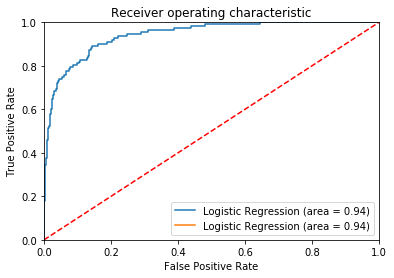

In [43]:
lr_prob = lr.predict_proba(Xtest)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(ytest, lr_prob[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

#lr_thresholds will gives all the threshold values

plt.figure()
plt.plot(lr_fpr, lr_tpr, _, label='Logistic Regression (area = %0.2f)' %lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Hyper Parameter Tuning using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
#Hyper Parameter
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 20)
# Create hyperparameter options
params = dict(C=C, penalty=penalty)
gs = GridSearchCV(lr, params, cv=10)
gs.fit(Xtrain, ytrain)

lr_bestAcc = gs.best_score_
lr_bestParam = gs.best_params_
print(lr_bestAcc, lr_bestParam)

0.9518496770405167 {'C': 2.636650898730358, 'penalty': 'l2'}


#### Build Model with optimal value

In [45]:
#Creating new model with best Parameters and running on the data again
C = lr_bestParam['C']
penalty = lr_bestParam['penalty']
lr = LogisticRegression(C=C, penalty= penalty)
lr.fit(Xtrain, ytrain)
lr_ypred = lr.predict(Xtest)

#### Final Results of Logistic Regression after Hyper Tuning

In [46]:
print("Best Accuracy after Tuning: {0}".format(lr_bestAcc))
print("Best Parameter after Hyper Tuning: {0}".format(lr_bestParam))
print("Classification Report: \n {0}".format(classification_report(ytest, lr_ypred)))
print("Accuracy Score: \n {0}".format(accuracy_score(ytest, lr_ypred)))
print("Confusion Matrix: \n {0}".format(confusion_matrix(ytest, lr_ypred)))
print("Model after Hyper Tuning - Score on Training Data : {0}".format(lr.score(Xtrain, ytrain)))
print("Model after Hyper Tuning - Score on Testing Data : {0}".format(lr.score(Xtest, ytest)))

Best Accuracy after Tuning: 0.9518496770405167
Best Parameter after Hyper Tuning: {'C': 2.636650898730358, 'penalty': 'l2'}
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1349
           1       0.76      0.59      0.66       111

    accuracy                           0.95      1460
   macro avg       0.87      0.79      0.82      1460
weighted avg       0.95      0.95      0.95      1460

Accuracy Score: 
 0.9547945205479452
Confusion Matrix: 
 [[1329   20]
 [  46   65]]
Model after Hyper Tuning - Score on Training Data : 0.9524368761009983
Model after Hyper Tuning - Score on Testing Data : 0.9547945205479452


### KNN Algorithm
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects. KNN fairs well in all of them.

1. Ease to interpret output
2. Calculation time
3. Predictive Power

##### Strength
1. KNN is pretty intuitive and simple
2. KNN has no assumptions
3. No Training Step and constantly evolves
4. Very easy to implement for multi-class problem

##### Weakness
1. KNN is a slow algorithm
2. Curse of Dimensionality
3. KNN needs homogeneous features
4. Imbalanced data like missing values, outliers etc causes problems

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, recall_score

In [48]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
# fitting the model & predict the response
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
# evaluate accuracy
print(accuracy_score(ytest, ypred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model & predict the response
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
# evaluate accuracy
print(accuracy_score(ytest, ypred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
# fitting the model & predict the response
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
# evaluate accuracy
print(accuracy_score(ytest, ypred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)
# fitting the model & predict the response
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
# evaluate accuracy
print(accuracy_score(ytest, ypred))

0.9308219178082192
0.9253424657534246
0.9267123287671233
0.9253424657534246


#### ROC Curve

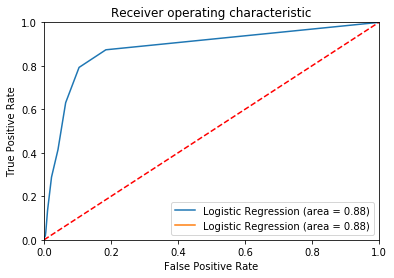

In [49]:
knn_prob = knn.predict_proba(Xtest)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn_prob[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

#knn_thresholds will gives all the threshold values

plt.figure()
plt.plot(knn_fpr, knn_tpr, _, label='Logistic Regression (area = %0.2f)' %knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Hyper Parameter Tuning & Finding Optimal value of k

In [50]:
knn = KNeighborsClassifier()
metric = ['euclidean', 'manhattan', 'minkowski']
param = dict(n_neighbors = list(range(1,21,2)), metric=metric)
gs = GridSearchCV(knn, param, cv=10, scoring='accuracy')
gs.fit(Xtrain, ytrain)

knn_bestScore = gs.best_score_
knn_bestParam = gs.best_params_
print(knn_bestScore)
print(knn_bestParam)

0.9304169113329419
{'metric': 'manhattan', 'n_neighbors': 7}


#### Rebuild KNN with optimal k

In [51]:
#Creating new model with best Parameters and running on the data again
k = knn_bestParam['n_neighbors']
metric = knn_bestParam['metric']
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
knn.fit(Xtrain, ytrain)
knn_ypred = knn.predict(Xtest)

#### Final Results of KNN after Hyper Tuning

In [52]:
print("Best Accuracy after Tuning: {0}".format(knn_bestScore))
print("Best Parameter after Hyper Tuning: {0}".format(knn_bestParam))
print("Classification Report: \n {0}".format(classification_report(ytest, knn_ypred)))
print("Accuracy Score: \n {0}".format(accuracy_score(ytest, knn_ypred)))
print("Confusion Matrix: \n {0}".format(confusion_matrix(ytest, knn_ypred)))
print("Model after Hyper Tuning - Score on Training Data : {0}".format(knn.score(Xtrain, ytrain)))
print("Model after Hyper Tuning - Score on Testing Data : {0}".format(knn.score(Xtest, ytest)))

Best Accuracy after Tuning: 0.9304169113329419
Best Parameter after Hyper Tuning: {'metric': 'manhattan', 'n_neighbors': 7}
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1349
           1       0.70      0.38      0.49       111

    accuracy                           0.94      1460
   macro avg       0.83      0.68      0.73      1460
weighted avg       0.93      0.94      0.93      1460

Accuracy Score: 
 0.9404109589041096
Confusion Matrix: 
 [[1331   18]
 [  69   42]]
Model after Hyper Tuning - Score on Training Data : 0.9450968878449795
Model after Hyper Tuning - Score on Testing Data : 0.9404109589041096


### Naive Bayes
Naive Bayes is a probabilistic algorithm that’s typically used for classification problems. Naive Bayes is simple, intuitive, and yet performs surprisingly well in many cases. For example, spam filters Email app uses are built on Naive Bayes. To solve the problem, a naive assumption is made i.e it pretend all features are independent.
##### Strength
1. Even though the naive assumption is rarely true, the algorithm performs surprisingly good in many cases.
2. Handles high dimensional data as well. Easy to parallelize and handles big data very well.
3. Performs better than more complicated models when the data set is small.

##### Weakness
1. The estimated probability is often inaccurate because of the naive assumption. Not ideal for regression use or probability estimation
2. When data is abundant, other more complicated models tend to outperform Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
nb.score(Xtrain, ytrain)

0.8907809747504404

In [55]:
nb.score(Xtest, ytest)

0.9034246575342466

In [56]:
nb_ypred = nb.predict(Xtest)
print("Classification Report: \n {0}".format(classification_report(ytest, nb_ypred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1349
           1       0.40      0.52      0.45       111

    accuracy                           0.90      1460
   macro avg       0.68      0.73      0.70      1460
weighted avg       0.92      0.90      0.91      1460



##### Precision
It is also known as Positive Predictive Value. It is a fraction of True Positive by Total Predicted Positive i.e. TP/TP+FP.
Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases

#### Recall
It is also known as Sensitivity or True Positive Rate. It is a fraction of True Positive by Total Actual Positive i.e. TP/TP+FN. Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases

#### F1-Score
It is a metric which takes into account both Precision and Recall. Defined as 2 * (Precision * Recall)/(Precision + Recall).
F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

In our case, all the three metric are closer to 1 when we need to find out a non buyer of PL i.e. 0. But, it is not so good in finding out a buyer of PL. This can be also because 90 % of the data for non buyer of PL.

#### ROC Curve

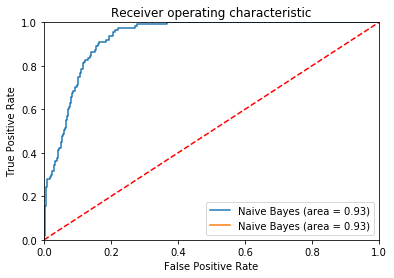

In [57]:
nb_prob = nb.predict_proba(Xtest)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb_prob[:,1])
nb_roc_auc = auc(nb_fpr, nb_tpr)

#nb_thresholds will gives all the threshold values

plt.figure()
plt.plot(nb_fpr, nb_tpr, _, label='Naive Bayes (area = %0.2f)' %nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
print("Classification Report: \n {0}".format(classification_report(ytest, nb_ypred)))
print("Accuracy Score: \n {0}".format(accuracy_score(ytest, nb_ypred)))
print("Confusion Matrix: \n {0}".format(confusion_matrix(ytest, nb_ypred)))
print("Score on Training Data : {0}".format(nb.score(Xtrain, ytrain)))
print("Score on Testing Data : {0}".format(nb.score(Xtest, ytest)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1349
           1       0.40      0.52      0.45       111

    accuracy                           0.90      1460
   macro avg       0.68      0.73      0.70      1460
weighted avg       0.92      0.90      0.91      1460

Accuracy Score: 
 0.9034246575342466
Confusion Matrix: 
 [[1261   88]
 [  53   58]]
Score on Training Data : 0.8907809747504404
Score on Testing Data : 0.9034246575342466


##### Observations
1. The model has scored around 90% accuracy in both the Training as well as Test Data
2. The confusion matrix details are already explained in the Logistic Regression section. The same applies here too.

The individual value of precision and recall can be calculated using the confusion matric by the formula
1. Precision = TP/TP+FP
2. Recall = TP/TP+FN

The classification report shows the corresponding value of Precision & Recall for all the 4 combinations.

In [59]:
print("Logistic Regression Classification Report: \n {0}".format(classification_report(ytest, lr_ypred)))
print("KNN Classification Report: \n {0}".format(classification_report(ytest, knn_ypred)))
print("Naive Bayes Classification Report: \n {0}".format(classification_report(ytest, nb_ypred)))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1349
           1       0.76      0.59      0.66       111

    accuracy                           0.95      1460
   macro avg       0.87      0.79      0.82      1460
weighted avg       0.95      0.95      0.95      1460

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1349
           1       0.70      0.38      0.49       111

    accuracy                           0.94      1460
   macro avg       0.83      0.68      0.73      1460
weighted avg       0.93      0.94      0.93      1460

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1349
           1       0.40      0.52      0.45       111

    accuracy                           0.90      1460
   macro avg     

##### Observations
1. The Accuracy for LR & KNN are equal at around 96% where NB has less accuracy i.e. around 90%
2. As explained earlier, the Type II error is more significant in our case i.e. we need to focus more on Recall. In this respect, KNN model is giving better values as compared to LR. Also, the F1 score is better hence KNN would be better in predicting potential buyer of Personal Loans.

In [60]:
print("Logistic Regression ROC: \n {0}".format(lr_roc_auc))
print("KNN ROC: \n {0}".format(knn_roc_auc))
print("Naive Bayes ROC: \n {0}".format(nb_roc_auc))

Logistic Regression ROC: 
 0.9426468722243371
KNN ROC: 
 0.8810263191286172
Naive Bayes ROC: 
 0.9277943621902109


#### AUC ROC Curve
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

##### Observations
1. The plotting of ROC curve for each model is shown in their respective section.
2. All the models are showing good measure of Separability
3. The ROC values shows that LR has a better ROC curve, followed by NB and KNN respectively.


### Hyper Parameters
Some of the Key hyper parameters are as follows
1. n_neighbors: Number of neighbors to use by default. Used in KNN
2. metric: Defines the distance metric to be used for the tree. Used in KNN
3. C: Inverse of regularization strength. Used in LR
4. penalty: Defines the type of penalty to be applied for penalization. Used in LR
5. random_state: The seed of the pseudo random number generator to use when shuffling the data.Used in LR
6. solver: Algorithm to be use for optimization. Used in LR
7. n_folds: To define the number of Folds. Used in K-Folds Cross Validation Iterator
8. kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ or ‘precomputed’. Used in SVM
9. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Used in SVM

### Regularization
This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. Primarily there are two techniques used for regularization
1. Lasso Regression (L1, Least Absolute Shrinkage and Selection Operator) : It adds "absolute value of magnitude" of coefficient as penalty term to the loss function.
2. Ridge Regression (L2) : It adds "squared magnitude" of coefficient as penalty term to the loss function.

The key difference between these two is the penalty term. Also, Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In the LR model, we are using L1 as well as L2 based on the optimal penalty decided after Hyper Parameter Tuning using GridSearchCV. By Default L2 regularization is used in LR.


### Evaluate Model Performance

LR: 0.952316 (0.011438)
KNN: 0.935880 (0.014560)
NB: 0.891904 (0.024754)


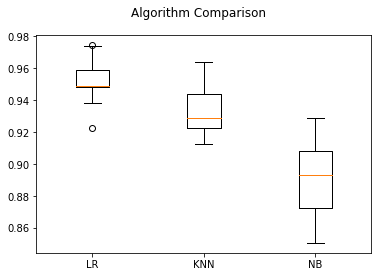

In [61]:
from sklearn import model_selection

seed = 7
# prepare models
models = []
models.append(('LR', lr))
models.append(('KNN', knn))
models.append(('NB', nb))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=25, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion
The aim was to create a model to accurately predict the likelihood of a liability customer buying personal loans. Three models were evaluated for this study. For the above graph, it shows that KNN and Logistic Regression model has accuracy of more than 95% (confidence interval) where as Naive Bayes has accuracy around 90%.

KNN is the model that has performed the best among the 3 models. It has highest accuracy i.e. >96%.